In [2]:
""" import the Tilings package... """
import sys
sys.path.insert(0, '../Tilings') # prepend the path to the Tiling package
""" import the other stuff """
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import Tilings as tl
import AB_envs as envs
import QuantumGraph as QGraph

from timeit import default_timer as timer # speed test

from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh
from scipy.stats import linregress

In [3]:
e = np.identity(4)
# start from a square
tiles0 = envs.square0(0.*e[0], e[0], e[2])
# create a tiling object holding the tiling
tiling = tl.A5(tiles0)
# inflate the initial tiles n times
n = 4
tiling.it_sub(4)
# create a periodic square approximant
cell = QGraph.SquareCell(tiling._graph)
# create a periodic square approximant, with diagonal couplings
delta = 0.1
cell_diag = QGraph.SquareCell(tiling.PHD_graph(1., delta))

In [4]:
# construct Hamiltonian with flux k across the unit cell, and hopping t
k = [0., 0.]
t = 1.
delta = 1.
cell_diag = QGraph.SquareCell(tiling.PHD_graph(1., delta))
ham = cell_diag.H(t, k)
# compute the whole spectrum (don't try this with n > 4 on a laptop)
E0, psi0= np.linalg.eigh(ham.todense())

In [14]:
# plot the spectrum
plt.plot(E, '-', ms=0.02)
plt.xlabel("n")
plt.ylabel(r"$E_n$")
plt.show()

In [89]:
len(tiling._graph)

1452

In [6]:
# construct Hamiltonian with flux k across the unit cell, and hopping t
k = [0., 0.]
t = 1.
deltas = np.arange(0.,1.1, 0.1)
ens = []
for delta in deltas:
    pg = QGraph.periodize(tiling.PHD_graph(1., delta))
    ham = nx.to_scipy_sparse_matrix(pg, dtype=float)
    # compute the whole spectrum (don't try this with n > 4 on a laptop)
    E, psi = np.linalg.eigh(ham.todense())
    ens.append(E)

In [ ]:
"""
Next size
"""
# construct Hamiltonian with flux k across the unit cell, and hopping t
k = [0., 0.]
t = 1.
deltas = np.arange(0.,1.1, 0.1)
ens1 = []
tiling.it_sub(5)
for delta in deltas:
    pg = QGraph.periodize(tiling.PHD_graph(1., delta))
    ham = nx.to_scipy_sparse_matrix(pg, dtype=float)
    # compute the whole spectrum (don't try this with n > 4 on a laptop)
    E1, psi = np.linalg.eigh(ham.todense())
    ens1.append(E1)

In [68]:
fig, ax = plt.subplots()
ax.axvline(x=len(ens[0])/lb**2., alpha=0.5, )

for delta, E in zip(deltas, ens):
    ax.plot(E, '-', ms=0.02, label=str(delta))
lb = 1.+np.sqrt(2)
plt.xlabel("n")
plt.ylabel(r"$E_n$")
plt.legend()
plt.savefig("spectrum_deltas_t_1.pdf")
plt.show()

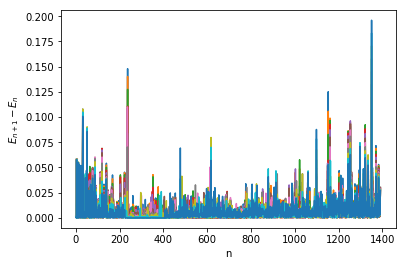

In [75]:
fig, ax = plt.subplots()
#ax.axvline(x=len(ens[0])/lb**2., alpha=0.5)
#ax.axvline(x=len(ens[0])/lb+len(ens[0])/lb**2., alpha=0.5)
for E in ens:
    ax.plot(E[1:]-E[:-1], '-', ms=0.02)#, label=str(delta))
lb = 1.+np.sqrt(2)
plt.xlabel("n")
plt.ylabel(r"$E_{n+1}-E_n$")
#plt.legend()
plt.savefig("dos_deltas_t_1.pdf")
plt.show()

In [10]:
"""
Find the idos of the gap
"""
lb = 1.+np.sqrt(2)
E = ens[0]
n = int(len(E)/lb**2.)
idos = n-3
[E[1:][m]-E[:-1][m] for m in range(idos-1,idos+2)]

gaps = []
meanE = []
for E in ens:
    gaps.append(E[1:][idos] - E[:-1][idos])
    meanE.append(0.5*(E[1:][idos] + E[:-1][idos]))
    
plt.plot(deltas, gaps, 'o')
plt.xlabel("$\delta$")
plt.ylabel(r"$E_{n+1}-E_n$")
#plt.legend()
plt.savefig("gap_deltas_t_1.pdf")
plt.show()

In [61]:
"""
Next size
"""
tiling.it_sub(5)
gaps1 = []
meanE1 = []
# correct the mean E
meanE[0] = -1.92
meanE[1] = -1.88
meanE[2] = -1.86
meanE[6] = -1.83
meanE[7] = -1.848

for delta, e in zip(deltas, meanE):
    pg = QGraph.periodize(tiling.PHD_graph(1., delta))
    ham = nx.to_scipy_sparse_matrix(pg, dtype=float)
    # compute the whole spectrum (don't try this with n > 4 on a laptop)
    # state below
    en0, vec0 = eigsh(ham, k=1, sigma = e, which='SA')
    # state above
    en1, vec1 = eigsh(ham, k=1, sigma = e, which='LA')
    
    gaps1.append(en1[0] - en0[0])
    meanE1.append(0.5*(en1[0] + en0[0]))

In [62]:
plt.plot(deltas, gaps, 'o')
plt.plot(deltas, gaps1, 'o')
plt.xlabel("$\delta$")
plt.ylabel(r"$E_{n+1}-E_n$")
#plt.legend()
plt.savefig("gap_deltas_t_1.pdf")
plt.show()

In [59]:
"""
Next size
"""
tiling.it_sub(5)
gaps1 = []
meanE1 = []
n = 8
delta, e = deltas[n], meanE[n]

pg = QGraph.periodize(tiling.PHD_graph(1., delta))
ham = nx.to_scipy_sparse_matrix(pg, dtype=float)
# compute the whole spectrum (don't try this with n > 4 on a laptop)
# state below
en0 = eigsh(ham, k=10, sigma = e, which='LA', return_eigenvectors=False)
en1 = eigsh(ham, k=10, sigma = e, which='SA', return_eigenvectors=False)
en = en1.tolist() + en0.tolist()

In [60]:
plt.axhline(y=e, alpha=0.5)
plt.plot(en, 'o')
plt.show()

In [35]:
# add ean gap energies by hand
meane1 = dict()
meane1[0] = -1.92
meane1[delta[1]] = -1.88
meane1[delta[2]] = -1.86
meane1[delta[3]] = -1.86

In [61]:
# construct Hamiltonian with flux k across the unit cell, and hopping t
k = [0., 0.]
t = 0.
delta = 1.
ens = []
pg = QGraph.periodize(tiling.PHD_graph(t, delta))
ham = nx.to_scipy_sparse_matrix(pg, dtype=float)
# compute the whole spectrum (don't try this with n > 4 on a laptop)
E, psi = np.linalg.eigh(ham.todense())

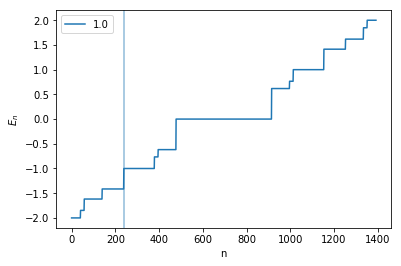

In [66]:
fig, ax = plt.subplots()
ax.axvline(x=len(E)/lb**2., alpha=0.5, )

ax.plot(E, '-', ms=0.02, label=str(delta))
lb = 1.+np.sqrt(2)
plt.xlabel("n")
plt.ylabel(r"$E_n$")
plt.legend()
plt.savefig("spectrum_delta_1_t_0.pdf")
plt.show()

In [59]:
# construct Hamiltonian with flux k across the unit cell, and hopping t
k = [0., 0.]
t = 1.
deltas = np.arange(0.,1.1, 0.1)
ens = []
for delta in deltas:
    pg = QGraph.periodize(tiling.PHD_graph(1., delta))
    ham = nx.to_scipy_sparse_matrix(pg, dtype=float)
    # compute the whole spectrum (don't try this with n > 4 on a laptop)
    E, psi = np.linalg.eigh(ham.todense())
    ens.append(E)
